In [12]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import os
import warnings
warnings.filterwarnings('ignore')

In [5]:
os.environ["OMP _NUM_THREADS"] = "1"

In [7]:
iris = load_iris()
x = iris.data

print("Shape of dataset:", x.shape)

Shape of dataset: (150, 4)


In [8]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [10]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 42)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

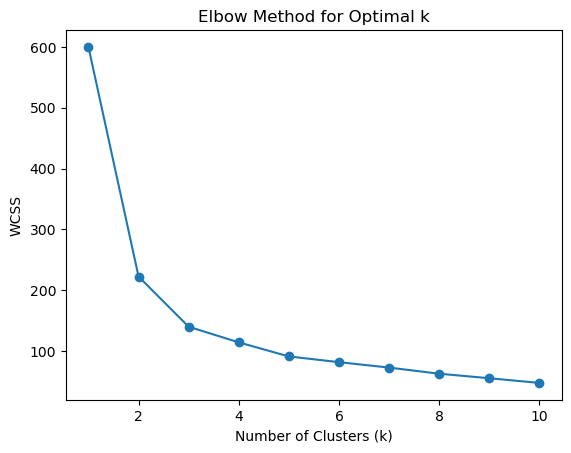

In [13]:
plt.figure()
plt.plot(range(1,11), wcss, marker = 'o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()

In [14]:
kmeans = KMeans(n_clusters = 3, random_state = 42)
clusters = kmeans.fit_predict(x_scaled)

In [15]:
print("Cluster labels:", clusters)

Cluster labels: [1 2 2 2 1 1 1 1 2 2 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 1 1 2 2 1
 1 2 1 1 2 2 1 1 2 1 2 1 1 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


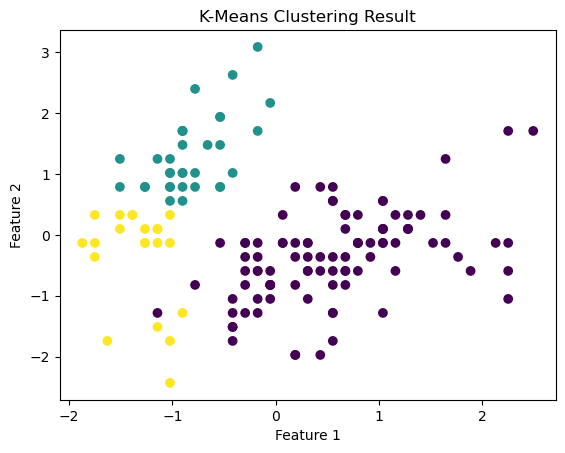

In [17]:
plt.figure()
plt.scatter(x_scaled[:,0], x_scaled[:,1],c = clusters)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("K-Means Clustering Result")
plt.show()